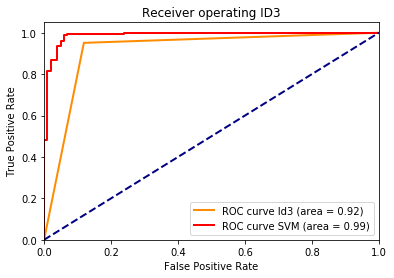

In [12]:
'''
    Code written by Yacine Mahdid 2019-11-24 for teaching purposes
    Ressources: 
        https://sefiks.com/2017/11/20/a-step-by-step-id3-decision-tree-example/
        https://en.wikipedia.org/wiki/ID3_algorithm
'''
# Data science import
import numpy as np

# Visualization import
import matplotlib.pyplot as plt

# General ML Import
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Specific Decision Tree import
from id3 import Id3Estimator

id3_estimator = Id3Estimator()
svm_estimator = svm.SVC(kernel='linear', probability=True)
dataset = load_breast_cancer()

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=.5,random_state=0)

y_score_id3 = id3_estimator.fit(X_train, y_train).predict(X_test)
y_score_svm = svm_estimator.fit(X_train, y_train).decision_function(X_test)

fpr_id3, tpr_id3, _  = roc_curve(y_test, y_score_id3)
roc_auc_id3 = auc(fpr_id3, tpr_id3)

fpr_svm, tpr_svm, _  = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_id3, tpr_id3, color='darkorange',lw=2, label='ROC curve Id3 (area = %0.2f)' % roc_auc_id3)
plt.plot(fpr_svm, tpr_svm, color='red',lw=2, label='ROC curve SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating ID3 vs SVM')
plt.legend(loc="lower right")
plt.show()



In [3]:
bunch

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
'''
    Code written by Yacine Mahdid 2019-11-24 for teaching purposes
    Ressources: 
        https://sefiks.com/2017/11/20/a-step-by-step-id3-decision-tree-example/
        https://en.wikipedia.org/wiki/ID3_algorithm
'''

import numpy as np



# Structure Setup
class Tree:    
    # Constructor for leaves
    def __init__(self,data):        
        # This is set only for leaves node
        self.data = data
        self.isLeave = False
        
    # Constructor for splitting node
    def __init__(self,splitDimension, splitValue,left,right):
        self.splitDimension = splitDimension
        self.splitValue = splitValue
        self.left = left
        self.right = right

# Entropy(S) = Sum for each classes in S of (-p(s)*log(p(s)))
def entropy(dataset):
    len_dataset = len(dataset)
    X, len_X = numpy.unique(a, return_counts=True)
    e = 0
    for len_x in len_X:
        p = len_x/len_dataset
        e = e + -p*np.log(p)

